In [156]:
# Instalamos el JDK 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [157]:
# Descargamos Spark
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

In [158]:
# Descomprimimos el archivo de Spark
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

In [159]:
# Se instala findSpark (usado para ubicar Spark y dejarlo disponible al interprete de Python)
!pip install -q findspark

In [160]:
# Se crean variables de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [161]:
# Se instala PySpark
!pip install -q pyspark

In [162]:
# Se verifica la instalación
import findspark
findspark.init()
from pyspark.sql import SparkSession
Spark = SparkSession.builder.master("local[*]").getOrCreate()

In [163]:
# Se prueba la session de Spark
# df = Spark.createDataFrame([{"Hola": "Mundo"} for x in range(10)])
# df.show(10, False)

In [164]:
!pip install faker

In [165]:
from faker import Faker
fake = Faker("es_AR")

In [166]:
pd.DataFrame.iteritems = pd.DataFrame.items

In [167]:
from random import randint
import pandas as pd

In [168]:
print('Aqui comienzo a crear todos los dataframes de las tablas de la API3, para posteriormente convertirlos en tablas de Spark')

Aqui comienzo a crear todos los dataframes de las tablas de la API3, para posteriormente convertirlos en tablas de Spark


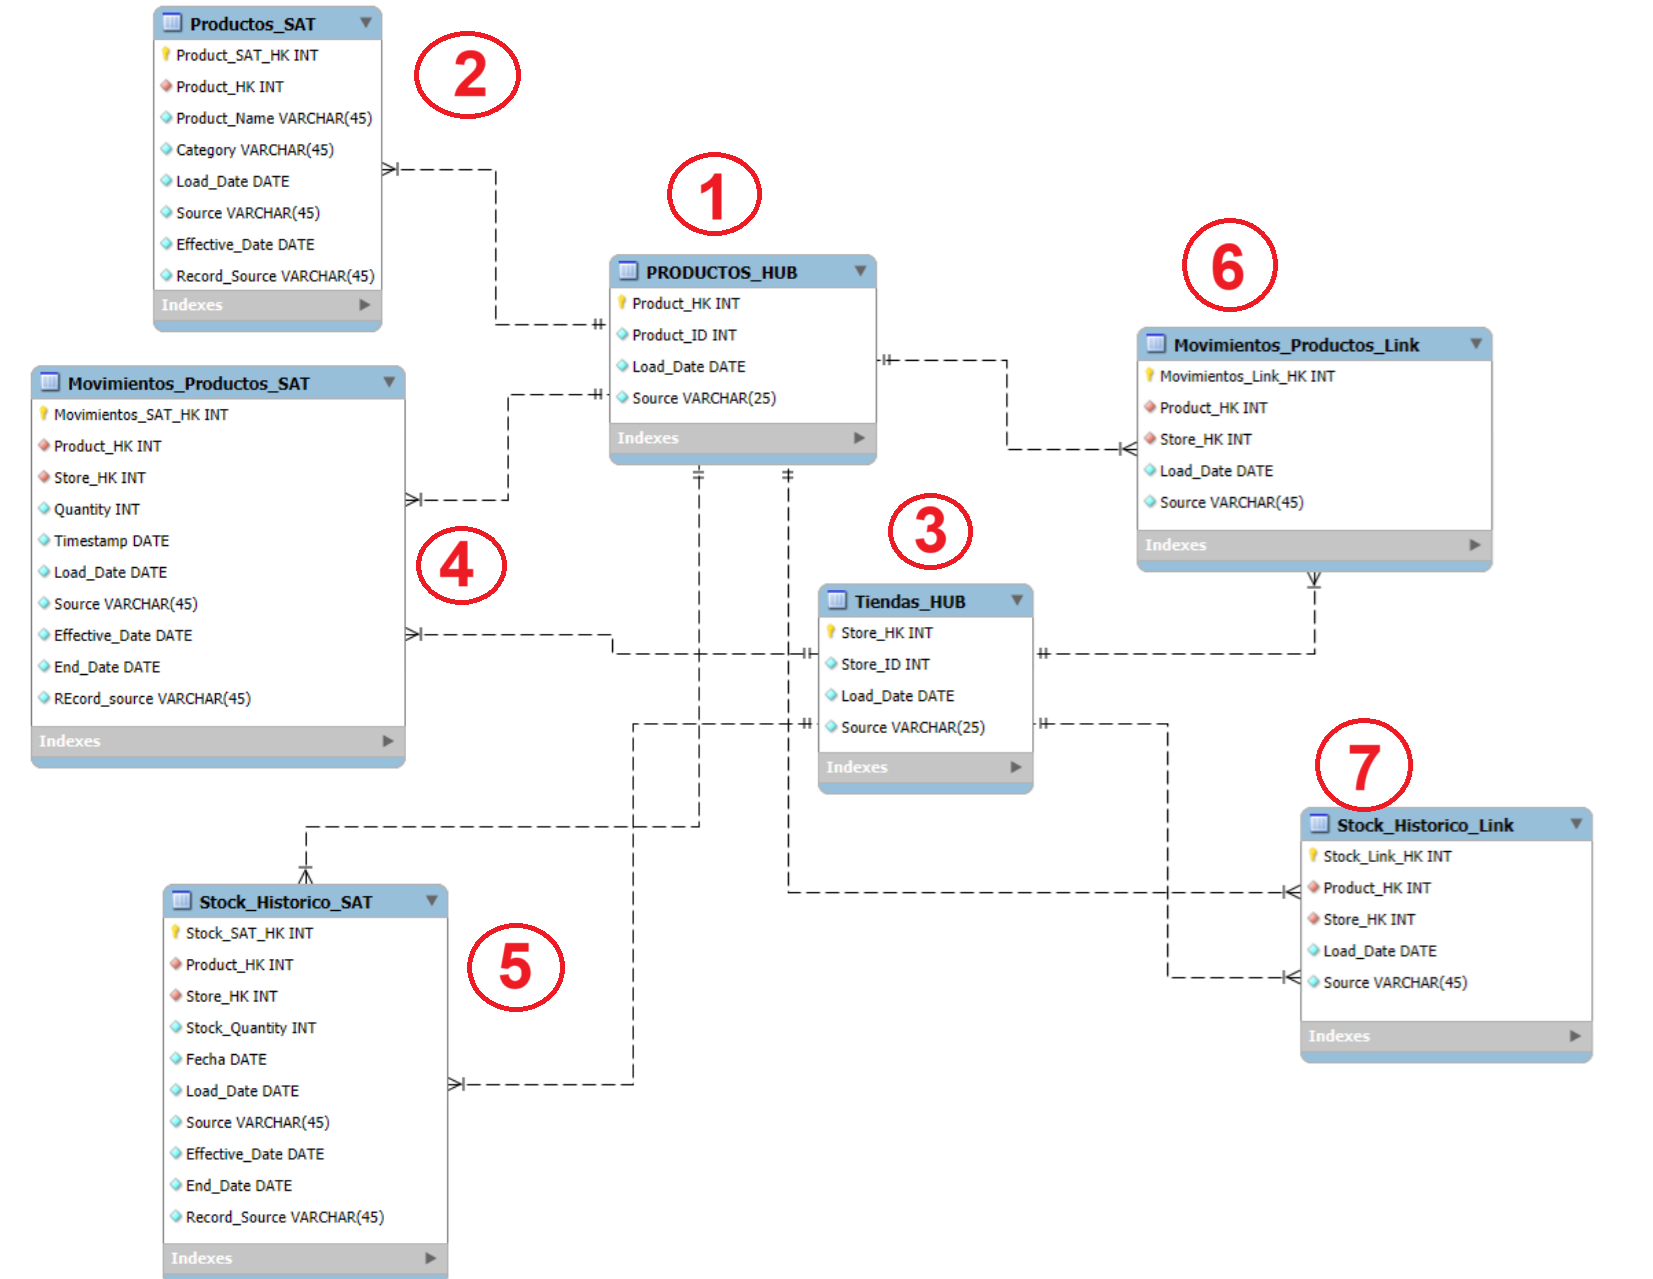

In [169]:
def generar_productos_hub(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Product_HK'] = i + 1
    data.loc[i, 'product_id '] = str(randint(1, 10))
    data.loc[i, 'load_date '] = fake.date_time_between()
    data.loc[i, 'sources'] = str(randint(100000, 500000))
  return data

pdf_productos_hub = generar_productos_hub(10)
pdf_productos_hub

,Product_HK,product_id,load_date,sources
0,1.0,7,1997-04-11 04:39:15.413976,349424
1,2.0,7,2024-01-17 12:52:21.011953,196579
2,3.0,4,2001-08-07 07:41:13.043419,453615
3,4.0,6,1997-02-10 03:16:56.535909,279867
4,5.0,3,2014-05-15 06:26:27.594725,310197
5,6.0,6,1996-10-02 23:15:47.608816,418897
6,7.0,7,2021-05-16 01:49:20.711623,343653
7,8.0,4,2015-02-04 06:37:23.405642,250206
8,9.0,6,2015-05-12 16:13:52.916626,114489
9,10.0,3,2003-04-02 07:42:18.898031,467594


In [170]:
df_hubproduct = Spark.createDataFrame(pdf_productos_hub,["Product_HK","product_id","load_date","sources"])
df_hubproduct.show()

+----------+----------+--------------------+-------+
|Product_HK|product_id|           load_date|sources|
+----------+----------+--------------------+-------+
|       1.0|         7|1997-04-11 04:39:...| 349424|
|       2.0|         7|2024-01-17 12:52:...| 196579|
|       3.0|         4|2001-08-07 07:41:...| 453615|
|       4.0|         6|1997-02-10 03:16:...| 279867|
|       5.0|         3|2014-05-15 06:26:...| 310197|
|       6.0|         6|1996-10-02 23:15:...| 418897|
|       7.0|         7|2021-05-16 01:49:...| 343653|
|       8.0|         4|2015-02-04 06:37:...| 250206|
|       9.0|         6|2015-05-12 16:13:...| 114489|
|      10.0|         3|2003-04-02 07:42:...| 467594|
+----------+----------+--------------------+-------+



In [171]:
def generar_productos_sat(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    product_hk = randint(1, 11);
    data.loc[i, 'Product_SAT_HK']= i + 1
    data.loc[i, 'Product_HK']= str(product_hk)
    data.loc[i, 'Product_Name']= fake.name()
    data.loc[i, 'category']= fake.name()
    data.loc[i, 'Load_Date']= fake.date_time_between()
    data.loc[i, 'sources']= str(randint(100000, 500000))
    data.loc[i, 'Effective_Date']= fake.date_time_between()
    data.loc[i, 'End_Date']= fake.date_time_between()
    data.loc[i, 'Record_Source']= str(randint(100000, 500000))
  return data

pdf_productos_sat = generar_productos_sat(10)
pdf_productos_sat

,Product_SAT_HK,Product_HK,Product_Name,category,Load_Date,sources,Effective_Date,End_Date,Record_Source
0,1.0,11,Luciano Benjamin Diaz Ferreyra,Josefina Perez,2015-02-08 03:14:42.557997,416435,2012-11-19 12:58:16.122462,1997-11-30 19:10:25.252600,142372
1,2.0,1,Malena Josefina Gomez Romero,Sr(a). Milagros Leiva,2003-01-02 16:52:24.720535,178674,2005-09-06 11:15:18.703064,2009-08-05 04:17:49.099542,473156
2,3.0,11,Agostina Benjamin Aguirre Rodriguez,Fausto Milo Guzman Navarro,2011-03-31 00:58:10.316555,452519,2002-05-29 12:49:19.629217,2004-09-20 20:04:16.029675,498880
3,4.0,1,Dr(a). Ignacio Diaz,Simon Mia Valentina Lopez,2001-07-05 14:05:30.366166,413840,2006-08-03 17:18:36.330310,2013-07-18 22:19:00.271307,222515
4,5.0,6,Joaquin Guadalupe Navarro Morales,Dr(a). Thiago Fernandez,2010-06-14 04:17:32.966188,179964,2000-04-05 05:17:02.510834,2013-01-01 13:59:18.434257,114082
5,6.0,7,Angelina Lorenzo Torres,Thiago Ezequiel Castro,2009-06-16 15:24:31.066699,411540,1997-02-02 21:32:45.898998,2006-11-29 03:33:06.996773,420041
6,7.0,1,Thiago Daniel Lucio Rodriguez Gimenez,Facundo Molina Lopez,2005-02-12 18:08:32.448704,417810,2004-07-03 04:51:53.895235,2014-09-30 11:03:47.839489,476823
7,8.0,4,Julieta Thiago Daniel Moreno Villalba,Sr(a). Ignacio Gomez,2010-04-04 04:32:43.745485,376570,2016-11-12 18:58:31.631522,2022-10-05 11:38:56.156247,424938
8,9.0,6,Sr(a). Santino Carrizo,Francisco Guzman,2004-09-04 13:26:30.314251,279021,2011-08-03 10:00:17.527148,2016-08-07 15:30:54.989627,196936
9,10.0,5,Agustín Sanchez Torres,Bautista Benjamin Rodriguez,2017-04-05 22:39:18.453495,196824,2007-07-31 03:49:03.701551,2010-01-01 14:38:26.530325,230275


In [172]:
df_stproduct = Spark.createDataFrame(pdf_productos_sat,["Product_SAT_HK","Product_HK","Product_Name","category","Load_Date","sources","Effective_Date","End_Date","Record_Source"])
df_stproduct.show()

+--------------+----------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+-------------+
|Product_SAT_HK|Product_HK|        Product_Name|            category|           Load_Date|sources|      Effective_Date|            End_Date|Record_Source|
+--------------+----------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+-------------+
|           1.0|        11|Luciano Benjamin ...|      Josefina Perez|2015-02-08 03:14:...| 416435|2012-11-19 12:58:...|1997-11-30 19:10:...|       142372|
|           2.0|         1|Malena Josefina G...|Sr(a). Milagros L...|2003-01-02 16:52:...| 178674|2005-09-06 11:15:...|2009-08-05 04:17:...|       473156|
|           3.0|        11|Agostina Benjamin...|Fausto Milo Guzma...|2011-03-31 00:58:...| 452519|2002-05-29 12:49:...|2004-09-20 20:04:...|       498880|
|           4.0|         1| Dr(a). Ignacio Diaz|Simon Mia Valenti...|2

In [173]:
def generar_tiendas_hub(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Store_HK'] = i + 1
    data.loc[i, 'store_id'] = str(randint(1, 10))
    data.loc[i, 'load_date'] = fake.date_time_between()
    data.loc[i, 'sources'] = str(randint(100000, 500000))
  return data

pdf_tiendas_hub = generar_tiendas_hub(10)
pdf_tiendas_hub

,Store_HK,store_id,load_date,sources
0,1.0,9,2012-06-28 02:26:25.666984,428171
1,2.0,8,2006-09-01 15:59:37.958309,375461
2,3.0,7,2011-07-15 04:56:36.602015,420210
3,4.0,9,2001-12-05 09:30:57.777163,213754
4,5.0,2,1998-06-12 09:59:43.876929,215911
5,6.0,3,2007-03-12 10:01:50.900507,356626
6,7.0,10,2006-01-13 12:02:02.387057,240357
7,8.0,10,2013-09-29 18:24:53.691706,137314
8,9.0,5,2016-02-09 20:42:30.370251,445020
9,10.0,4,2004-04-16 22:31:50.790947,301546


In [174]:
df_hubtiendas = Spark.createDataFrame(pdf_tiendas_hub,["Store_HK","store_id","load_date","sources"])
df_hubtiendas.show()

+--------+--------+--------------------+-------+
|Store_HK|store_id|           load_date|sources|
+--------+--------+--------------------+-------+
|     1.0|       9|2012-06-28 02:26:...| 428171|
|     2.0|       8|2006-09-01 15:59:...| 375461|
|     3.0|       7|2011-07-15 04:56:...| 420210|
|     4.0|       9|2001-12-05 09:30:...| 213754|
|     5.0|       2|1998-06-12 09:59:...| 215911|
|     6.0|       3|2007-03-12 10:01:...| 356626|
|     7.0|      10|2006-01-13 12:02:...| 240357|
|     8.0|      10|2013-09-29 18:24:...| 137314|
|     9.0|       5|2016-02-09 20:42:...| 445020|
|    10.0|       4|2004-04-16 22:31:...| 301546|
+--------+--------+--------------------+-------+



In [175]:
def generar_movimientos_productos_sat(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Movimientos_Productos_SAT'] = i + 1
    data.loc[i, 'Product_HK'] = str(randint(1, 10))
    data.loc[i, 'Quantity'] = str(randint(100000, 500000))
    data.loc[i, 'Timestamp'] = fake.date_time_between()
    data.loc[i, 'Load_Date'] = fake.date_time_between()
    data.loc[i, 'Sources'] = str(randint(100000, 500000))
    data.loc[i, 'Effective_Date'] = fake.date_time_between()
    data.loc[i, 'End_Date'] = fake.date_time_between()
    data.loc[i, 'Record_source'] = str(randint(100000, 500000))
  return data

pdf_productos_sat = generar_productos_sat(10)
pdf_productos_sat

,Product_SAT_HK,Product_HK,Product_Name,category,Load_Date,sources,Effective_Date,End_Date,Record_Source
0,1.0,2,Ignacio Ponce Flores,Santino Tomas Vargas Valdez,2013-04-03 12:25:37.260657,450628,1996-08-28 16:23:33.889401,1996-02-27 17:50:43.629470,106600
1,2.0,5,Dr(a). Juan Pablo Duarte,Thiago Leonel Florencia Vega Rodriguez,1999-10-27 07:34:00.224842,167419,2001-03-12 18:06:44.092857,2018-04-07 09:50:53.370145,196345
2,3.0,8,Emma Blanco,Sr(a). Benjamin Rodriguez,2003-09-26 22:39:40.439072,410367,2006-06-17 04:35:04.036005,1998-02-21 00:27:14.004938,202580
3,4.0,7,Sofia Maldonado,Juan Cruz Fernandez,2012-02-17 14:21:50.598619,221405,2002-10-08 09:40:13.378493,1999-05-11 02:47:06.385494,122444
4,5.0,1,Mateo Benitez Ortiz,Emma Paez Cabrera,2004-03-17 00:09:55.434999,209927,1998-04-12 22:00:41.526963,2024-08-11 15:05:51.483554,490163
5,6.0,6,Sr(a). Juana Ferreyra,Maria Emilia Santiago Silva,2002-05-18 10:07:44.252481,334503,2014-05-01 02:35:36.773877,2019-02-01 22:42:57.481940,304700
6,7.0,1,Emiliano Rios Arias,Dr(a). Lautaro Roldan,2018-12-26 18:15:15.075060,259142,2010-01-24 15:40:14.081025,2013-10-30 14:22:55.281035,200319
7,8.0,8,Dr(a). Martín Quiroga,Salvador Benjamin Mendoza Perez,2000-08-18 19:30:31.816182,173778,2002-05-14 06:12:57.449887,2022-01-06 05:54:24.209787,348826
8,9.0,6,Jazmin Renata Vera,Helena Flores,2013-03-28 18:32:16.723809,403244,2022-11-22 12:46:52.897221,2001-03-17 16:21:00.059612,149955
9,10.0,6,Dr(a). Martín Moreno,Sr(a). Valentina Pereyra,2003-09-29 23:23:46.471486,488996,2013-12-06 16:46:37.364870,2018-02-25 18:58:33.305486,382254


In [176]:
df_satproductos = Spark.createDataFrame(pdf_productos_sat,["Product_SAT_HK","Product_HK","Product_Name","category","Load_Date","sources","Effective_Date","End_Date","Record_Source"])
df_satproductos.show()

+--------------+----------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+-------------+
|Product_SAT_HK|Product_HK|        Product_Name|            category|           Load_Date|sources|      Effective_Date|            End_Date|Record_Source|
+--------------+----------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+-------------+
|           1.0|         2|Ignacio Ponce Flores|Santino Tomas Var...|2013-04-03 12:25:...| 450628|1996-08-28 16:23:...|1996-02-27 17:50:...|       106600|
|           2.0|         5|Dr(a). Juan Pablo...|Thiago Leonel Flo...|1999-10-27 07:34:...| 167419|2001-03-12 18:06:...|2018-04-07 09:50:...|       196345|
|           3.0|         8|         Emma Blanco|Sr(a). Benjamin R...|2003-09-26 22:39:...| 410367|2006-06-17 04:35:...|1998-02-21 00:27:...|       202580|
|           4.0|         7|     Sofia Maldonado| Juan Cruz Fernandez|2

In [177]:
def generar_stock_historico_sat(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Stock_SAT_HK'] = i + 1
    data.loc[i, 'Product_HK'] = randint(1, 10)
    data.loc[i, 'Store_HK'] = str(randint(100000, 500000))
    data.loc[i, 'Stock_Quantity'] = randint(1, 10)
    data.loc[i, 'fecha'] = fake.date_time_between()
    data.loc[i, 'Load_Date'] = fake.date_time_between()
    data.loc[i, 'Sources'] = str(randint(100000, 500000))
    data.loc[i, 'Effective_Date'] = fake.date_time_between()
    data.loc[i, 'End_Date'] = fake.date_time_between()
    data.loc[i, 'Record_source'] = str(randint(100000, 500000))
  return data

pdf_stock_historico_sat = generar_stock_historico_sat(10)
pdf_stock_historico_sat

,Stock_SAT_HK,Product_HK,Store_HK,Stock_Quantity,fecha,Load_Date,Sources,Effective_Date,End_Date,Record_source
0,1.0,3.0,313009,6.0,2004-12-11 23:12:46.548418,2011-07-01 22:20:31.479042,362734,1998-07-04 11:10:30.244811,1996-01-28 13:09:40.036476,161081
1,2.0,7.0,122534,7.0,2012-06-26 05:34:44.919341,2014-03-01 06:07:14.592380,463652,1995-11-14 04:43:46.983051,2013-07-19 13:39:52.402973,446674
2,3.0,4.0,350487,6.0,2021-02-10 07:24:44.134573,2021-08-31 23:39:08.521712,327504,2014-12-12 16:02:04.795669,2019-03-29 22:17:24.646431,211524
3,4.0,4.0,457240,10.0,2019-07-30 03:23:18.089354,2010-03-16 18:21:43.795192,277452,2006-09-04 20:41:58.494976,2018-05-09 05:01:30.623518,129496
4,5.0,6.0,307837,2.0,2015-06-13 20:04:34.684733,2024-01-18 02:20:53.240715,486463,2017-03-15 21:20:29.953825,2019-11-06 17:16:56.668376,180532
5,6.0,6.0,163910,6.0,2007-05-22 05:44:33.537308,2008-01-21 21:30:26.329073,478242,1997-05-18 08:30:11.539472,1999-03-04 20:14:20.852153,324518
6,7.0,10.0,165034,10.0,2020-01-24 07:01:04.369792,2023-12-04 23:48:19.793555,462220,2004-10-25 09:18:15.530966,2003-10-31 06:56:19.097921,303382
7,8.0,9.0,407332,7.0,1999-11-20 20:16:15.874033,2007-09-19 02:52:44.311457,415717,2016-11-09 10:03:02.761744,2012-07-29 06:23:42.201200,191788
8,9.0,1.0,333424,8.0,2000-04-07 15:46:21.859852,2018-06-09 05:31:55.279642,488620,1997-04-04 06:52:27.231374,2006-02-08 05:04:47.632372,273332
9,10.0,2.0,110370,5.0,1995-05-31 15:43:42.392295,2020-10-12 09:21:15.358104,281494,1996-09-08 06:57:49.144545,2009-12-05 17:50:24.644767,376615


In [178]:
df_satstockhistorico = Spark.createDataFrame(pdf_stock_historico_sat,["Stock_SAT_HK","Product_HK","Store_HK","Stock_Quantity","fecha","Load_Date","Sources","Effective_Date","End_Date","Record_source"])
df_satstockhistorico.show()

+------------+----------+--------+--------------+--------------------+--------------------+-------+--------------------+--------------------+-------------+
|Stock_SAT_HK|Product_HK|Store_HK|Stock_Quantity|               fecha|           Load_Date|Sources|      Effective_Date|            End_Date|Record_source|
+------------+----------+--------+--------------+--------------------+--------------------+-------+--------------------+--------------------+-------------+
|         1.0|       3.0|  313009|           6.0|2004-12-11 23:12:...|2011-07-01 22:20:...| 362734|1998-07-04 11:10:...|1996-01-28 13:09:...|       161081|
|         2.0|       7.0|  122534|           7.0|2012-06-26 05:34:...|2014-03-01 06:07:...| 463652|1995-11-14 04:43:...|2013-07-19 13:39:...|       446674|
|         3.0|       4.0|  350487|           6.0|2021-02-10 07:24:...|2021-08-31 23:39:...| 327504|2014-12-12 16:02:...|2019-03-29 22:17:...|       211524|
|         4.0|       4.0|  457240|          10.0|2019-07-30 03:2

In [179]:
def generar_movimientos_productos_link(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Movimientos_Link_HK'] = i + 1
    data.loc[i, 'Product_HK'] = randint(1, 10)
    data.loc[i, 'Store_HK'] = str(randint(100000, 500000))
    data.loc[i, 'Load_Date'] = fake.date_time_between()
    data.loc[i, 'Sources'] = str(randint(100000, 500000))
  return data

pdf_movimientos_productos_link = generar_movimientos_productos_link(10)
pdf_movimientos_productos_link

,Movimientos_Link_HK,Product_HK,Store_HK,Load_Date,Sources
0,1.0,10.0,158287,2021-03-10 22:24:39.820357,118222
1,2.0,1.0,162261,2012-05-18 12:13:02.050506,164178
2,3.0,1.0,111865,2002-03-15 08:48:34.231128,461885
3,4.0,1.0,283280,2014-07-24 11:31:54.482151,286964
4,5.0,2.0,470163,1996-10-10 18:28:05.782297,430262
5,6.0,10.0,459147,1994-11-28 14:53:42.369654,317148
6,7.0,5.0,289039,1998-12-07 07:23:24.588188,331612
7,8.0,9.0,129158,1999-07-06 17:44:51.502906,467222
8,9.0,6.0,286059,2003-02-09 02:02:51.010358,233943
9,10.0,7.0,343305,2004-01-14 03:10:49.013739,194644


In [180]:
df_linkmovimientosproductos = Spark.createDataFrame(pdf_movimientos_productos_link,["Movimientos_Link_HK","Product_HK","Store_HK","Load_Date","Sources"])
df_linkmovimientosproductos.show()

+-------------------+----------+--------+--------------------+-------+
|Movimientos_Link_HK|Product_HK|Store_HK|           Load_Date|Sources|
+-------------------+----------+--------+--------------------+-------+
|                1.0|      10.0|  158287|2021-03-10 22:24:...| 118222|
|                2.0|       1.0|  162261|2012-05-18 12:13:...| 164178|
|                3.0|       1.0|  111865|2002-03-15 08:48:...| 461885|
|                4.0|       1.0|  283280|2014-07-24 11:31:...| 286964|
|                5.0|       2.0|  470163|1996-10-10 18:28:...| 430262|
|                6.0|      10.0|  459147|1994-11-28 14:53:...| 317148|
|                7.0|       5.0|  289039|1998-12-07 07:23:...| 331612|
|                8.0|       9.0|  129158|1999-07-06 17:44:...| 467222|
|                9.0|       6.0|  286059|2003-02-09 02:02:...| 233943|
|               10.0|       7.0|  343305|2004-01-14 03:10:...| 194644|
+-------------------+----------+--------+--------------------+-------+



In [181]:
def generar_stock_historico_link(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Stock_Link_HK'] = i + 1
    data.loc[i, 'Product_HK'] = randint(1, 10)
    data.loc[i, 'Store_HK'] = str(randint(100000, 500000))
    data.loc[i, 'Load_Date'] = fake.date_time_between()
    data.loc[i, 'Sources'] = str(randint(100000, 500000))
  return data

pdf_stock_historico_link = generar_stock_historico_link(10)
pdf_stock_historico_link

,Stock_Link_HK,Product_HK,Store_HK,Load_Date,Sources
0,1.0,5.0,321556,2014-08-03 11:35:50.918470,354082
1,2.0,7.0,377391,1995-12-04 20:46:02.493271,201046
2,3.0,9.0,253534,2005-08-31 00:03:32.704936,263542
3,4.0,9.0,447962,2012-02-11 01:50:27.562794,278940
4,5.0,6.0,309361,2001-03-17 08:29:58.746870,401521
5,6.0,2.0,336705,2023-11-23 07:33:14.783262,245369
6,7.0,6.0,490229,2019-03-19 08:01:01.202928,315992
7,8.0,1.0,274926,2005-02-27 03:16:58.205018,420095
8,9.0,9.0,203765,2020-11-14 11:11:42.446947,385354
9,10.0,8.0,385298,1997-09-29 06:42:51.677424,194948


In [182]:
df_linkstockhistorico = Spark.createDataFrame(pdf_stock_historico_link,["Stock_Link_HK","Product_HK","Store_HK","Load_Date","Sources"])
df_linkstockhistorico.show()

+-------------+----------+--------+--------------------+-------+
|Stock_Link_HK|Product_HK|Store_HK|           Load_Date|Sources|
+-------------+----------+--------+--------------------+-------+
|          1.0|       5.0|  321556|2014-08-03 11:35:...| 354082|
|          2.0|       7.0|  377391|1995-12-04 20:46:...| 201046|
|          3.0|       9.0|  253534|2005-08-31 00:03:...| 263542|
|          4.0|       9.0|  447962|2012-02-11 01:50:...| 278940|
|          5.0|       6.0|  309361|2001-03-17 08:29:...| 401521|
|          6.0|       2.0|  336705|2023-11-23 07:33:...| 245369|
|          7.0|       6.0|  490229|2019-03-19 08:01:...| 315992|
|          8.0|       1.0|  274926|2005-02-27 03:16:...| 420095|
|          9.0|       9.0|  203765|2020-11-14 11:11:...| 385354|
|         10.0|       8.0|  385298|1997-09-29 06:42:...| 194948|
+-------------+----------+--------+--------------------+-------+



In [183]:
print('Para que traiga el stock pero filtrando que sea del dia de ayer')

Para que traiga el stock pero filtrando que sea del dia de ayer


In [184]:
from pyspark.sql import functions as F
from datetime import datetime, timedelta

ayer = datetime.now() - timedelta(days=1)

df_filtrado = df_satstockhistorico.filter(F.col("fecha") == ayer)
df_filtrado.show()

+------------+----------+--------+--------------+-----+---------+-------+--------------+--------+-------------+
|Stock_SAT_HK|Product_HK|Store_HK|Stock_Quantity|fecha|Load_Date|Sources|Effective_Date|End_Date|Record_source|
+------------+----------+--------+--------------+-----+---------+-------+--------------+--------+-------------+
+------------+----------+--------+--------------+-----+---------+-------+--------------+--------+-------------+



In [186]:
print('''Si bien anteriormente es posible que no traiga ningun dato filtrado del Spark de Stock Historico Sat con la fecha de ayer, \n
podemos verificarlo con un dato traido por ejemplo este siguiente código, traemos del dataframe original una fecha cualquiera
''')

Si bien anteriormente es posible que no traiga ningun dato filtrado del Spark de Stock Historico Sat con la fecha de ayer, 

podemos verificarlo con un dato traido por ejemplo este siguiente código, traemos del dataframe original una fecha cualquiera



In [187]:
# Aqui traemos la primer fecha cargada mediante Faker
valor = pdf_stock_historico_sat['fecha']
valor[0]

Timestamp('2004-12-11 23:12:46.548418')

In [188]:
print('Y podemos ver que si filtra en el Spark de Stock Historico Sat')

Y podemos ver que si filtra en el Spark de Stock Historico Sat


In [189]:
fecha_extraida = valor[0]

df_filtrado = df_satstockhistorico.filter(F.col("fecha") == fecha_extraida)
df_filtrado.show()

+------------+----------+--------+--------------+--------------------+--------------------+-------+--------------------+--------------------+-------------+
|Stock_SAT_HK|Product_HK|Store_HK|Stock_Quantity|               fecha|           Load_Date|Sources|      Effective_Date|            End_Date|Record_source|
+------------+----------+--------+--------------+--------------------+--------------------+-------+--------------------+--------------------+-------------+
|         1.0|       3.0|  313009|           6.0|2004-12-11 23:12:...|2011-07-01 22:20:...| 362734|1998-07-04 11:10:...|1996-01-28 13:09:...|       161081|
+------------+----------+--------+--------------+--------------------+--------------------+-------+--------------------+--------------------+-------------+



In [190]:
print('''Ahora realizo el punto numero 2, del ejercicio que dice: \n
Crear un datamart aislado que contenga la información de los proveedores utilizando SPARK.
''')

Ahora realizo el punto numero 2, del ejercicio que dice: 

Crear un datamart aislado que contenga la información de los proveedores utilizando SPARK.



In [191]:
print('Los diagrama de bases de datos son exactamente los mismos que la API3 asi que solo coloco el orden de las tablas como las voy creando')

Los diagrama de bases de datos son exactamente los mismos que la API3 asi que solo coloco el orden de las tablas como las voy creando


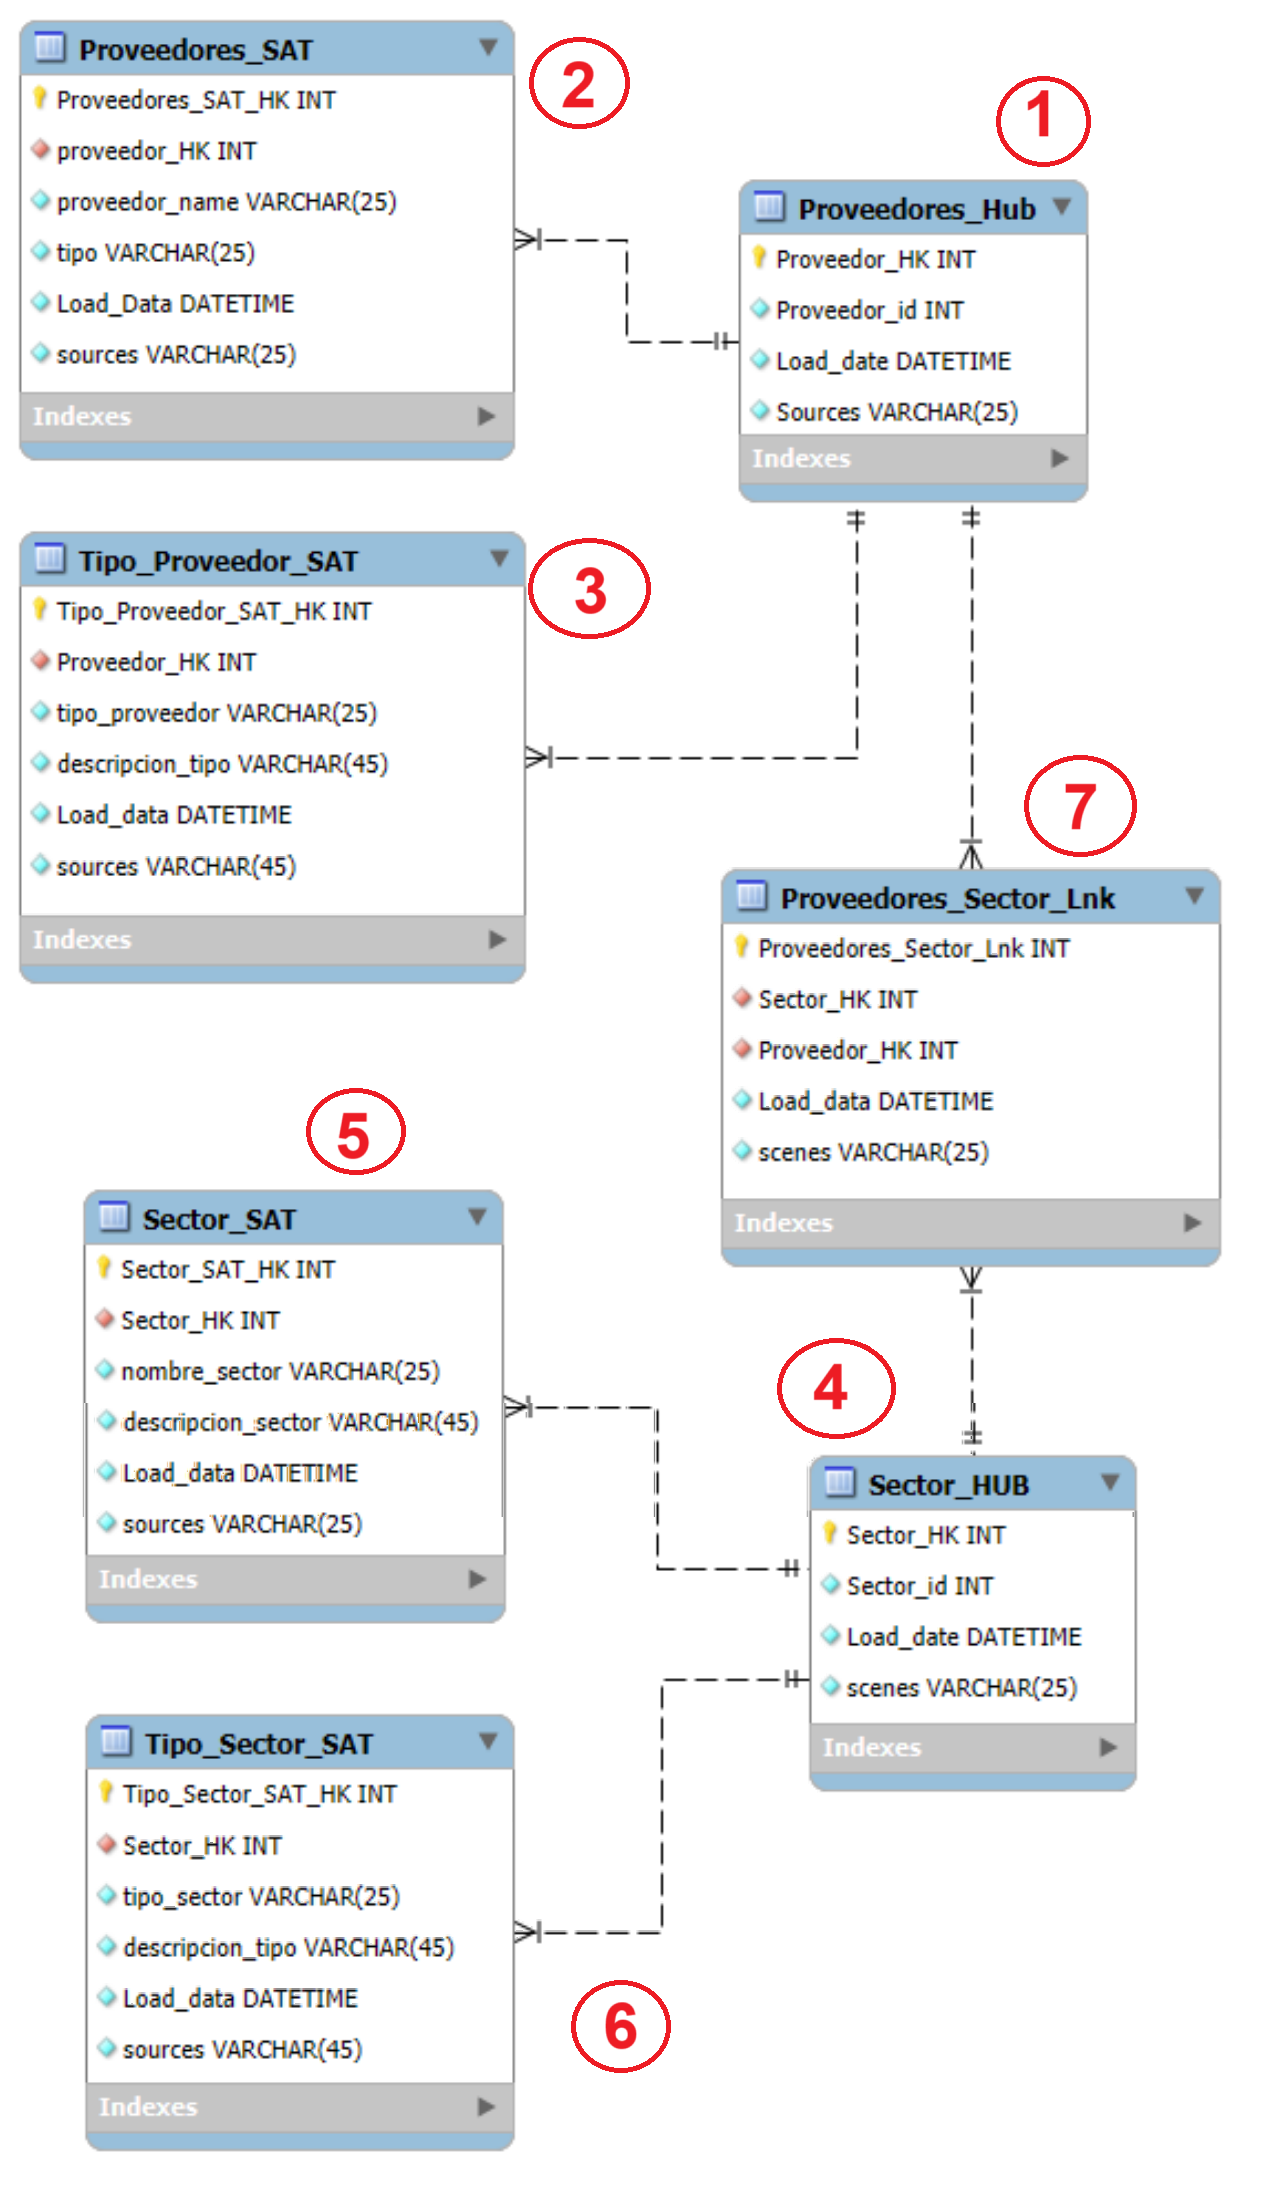

In [192]:
print('''Ahora realizo el punto numero 3, del ejercicio que dice: \n
Crear un datamart para la información de scanning de productos
''')

Ahora realizo el punto numero 3, del ejercicio que dice: 

Crear un datamart para la información de scanning de productos



In [193]:
print('''Al igual que los ejercicios anteriores, los diagrama de bases de datos son exactamente los mismos que la API3 \n
 asi que solo coloco el orden de las tablas como las voy creando''')

Al igual que los ejercicios anteriores, los diagrama de bases de datos son exactamente los mismos que la API3 

 asi que solo coloco el orden de las tablas como las voy creando


In [194]:
def generar_proveedores_hub(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Proveedor_HK'] = i + 1
    data.loc[i, 'Proveedor_id'] = randint(1, 10)
    data.loc[i, 'Load_data'] = fake.date_time_between()
    data.loc[i, 'Sources'] = str(randint(100000, 500000))
  return data

pdf_proveedores_hub = generar_proveedores_hub(10)
pdf_proveedores_hub

,Proveedor_HK,Proveedor_id,Load_data,Sources
0,1.0,10.0,2001-05-31 19:37:12.527630,430052
1,2.0,2.0,1995-08-21 03:04:13.487978,239660
2,3.0,8.0,2000-05-16 03:24:05.271417,391661
3,4.0,9.0,2022-08-05 01:45:06.275789,300870
4,5.0,9.0,1997-08-15 08:10:03.068045,370743
5,6.0,6.0,2017-11-14 22:17:57.015202,357125
6,7.0,5.0,1998-12-02 04:53:04.365285,192551
7,8.0,4.0,2008-11-10 03:52:53.499792,384264
8,9.0,1.0,2020-04-20 11:05:50.521745,334316
9,10.0,7.0,2006-09-03 14:05:47.270134,460829


In [195]:
df_hubproveedores = Spark.createDataFrame(pdf_proveedores_hub,["Proveedor_HK","Proveedor_id","Load_data","Sources"])
df_hubproveedores.show()

+------------+------------+--------------------+-------+
|Proveedor_HK|Proveedor_id|           Load_data|Sources|
+------------+------------+--------------------+-------+
|         1.0|        10.0|2001-05-31 19:37:...| 430052|
|         2.0|         2.0|1995-08-21 03:04:...| 239660|
|         3.0|         8.0|2000-05-16 03:24:...| 391661|
|         4.0|         9.0|2022-08-05 01:45:...| 300870|
|         5.0|         9.0|1997-08-15 08:10:...| 370743|
|         6.0|         6.0|2017-11-14 22:17:...| 357125|
|         7.0|         5.0|1998-12-02 04:53:...| 192551|
|         8.0|         4.0|2008-11-10 03:52:...| 384264|
|         9.0|         1.0|2020-04-20 11:05:...| 334316|
|        10.0|         7.0|2006-09-03 14:05:...| 460829|
+------------+------------+--------------------+-------+



In [196]:
def generar_proveedores_sat(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Proveedores_SAT_HK'] = i + 1
    data.loc[i, 'proveedor_HK'] = randint(1, 10)
    data.loc[i, 'proveedor_name'] = fake.name
    data.loc[i, 'tipo'] = fake.text
    data.loc[i, 'Load_data'] = fake.date_time_between()
    data.loc[i, 'sources'] = str(randint(100000, 500000))
  return data

pdf_proveedores_sat = generar_proveedores_sat(10)
pdf_proveedores_sat

,Proveedores_SAT_HK,proveedor_HK,proveedor_name,tipo,Load_data,sources
0,1.0,7.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2008-11-10 20:19:28.517980,304892
1,2.0,3.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2015-10-31 02:50:45.296970,418404
2,3.0,6.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2020-08-16 01:25:10.704058,356105
3,4.0,3.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2003-12-05 00:10:24.677323,106284
4,5.0,8.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2013-05-30 22:35:54.172976,469578
5,6.0,10.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2019-04-13 09:33:38.663298,134111
6,7.0,2.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2023-09-18 22:54:05.730409,378905
7,8.0,5.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2007-11-10 18:28:21.035908,140758
8,9.0,7.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2002-08-21 13:28:44.692599,445847
9,10.0,8.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2019-03-08 08:22:00.603224,255104


In [197]:
df_satproveedores = Spark.createDataFrame(pdf_proveedores_sat,["Proveedores_SAT_HK","proveedor_HK","proveedor_name","tipo","Load_data","sources"])
df_satproveedores.show()

+------------------+------------+--------------+----+--------------------+-------+
|Proveedores_SAT_HK|proveedor_HK|proveedor_name|tipo|           Load_data|sources|
+------------------+------------+--------------+----+--------------------+-------+
|               1.0|         7.0|            {}|  {}|2008-11-10 20:19:...| 304892|
|               2.0|         3.0|            {}|  {}|2015-10-31 02:50:...| 418404|
|               3.0|         6.0|            {}|  {}|2020-08-16 01:25:...| 356105|
|               4.0|         3.0|            {}|  {}|2003-12-05 00:10:...| 106284|
|               5.0|         8.0|            {}|  {}|2013-05-30 22:35:...| 469578|
|               6.0|        10.0|            {}|  {}|2019-04-13 09:33:...| 134111|
|               7.0|         2.0|            {}|  {}|2023-09-18 22:54:...| 378905|
|               8.0|         5.0|            {}|  {}|2007-11-10 18:28:...| 140758|
|               9.0|         7.0|            {}|  {}|2002-08-21 13:28:...| 445847|
|   

In [198]:
def generar_tipo_proveedor_sat(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Tipo_Proveedor_SAT_HK'] = i + 1
    data.loc[i, 'proveedor_HK'] = randint(1, 10)
    data.loc[i, 'tipo_proveedor'] = fake.text
    data.loc[i, 'descripcion_tipo'] = fake.text
    data.loc[i, 'Load_data'] = fake.date_time_between()
    data.loc[i, 'sources'] = str(randint(100000, 500000))
  return data

pdf_tipo_proveedor_sat = generar_tipo_proveedor_sat(10)
pdf_tipo_proveedor_sat

,Tipo_Proveedor_SAT_HK,proveedor_HK,tipo_proveedor,descripcion_tipo,Load_data,sources
0,1.0,9.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2003-09-07 01:22:23.274390,382344
1,2.0,3.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2015-04-17 08:53:12.726943,155824
2,3.0,3.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2002-06-29 06:57:00.817923,476280
3,4.0,4.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2018-11-20 22:03:24.029484,101516
4,5.0,6.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2002-01-12 20:04:21.487829,280712
5,6.0,7.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2015-06-14 00:39:37.872577,295075
6,7.0,6.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2007-07-01 09:54:35.748714,385890
7,8.0,9.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2005-08-22 06:20:11.504455,275254
8,9.0,7.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2014-02-17 09:35:55.260727,244899
9,10.0,1.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2014-05-14 04:14:45.227627,285181


In [199]:
df_sattipoproveedores = Spark.createDataFrame(pdf_tipo_proveedor_sat,["Tipo_Proveedor_SAT_HK","proveedor_HK","tipo_proveedor","descripcion_tipo","Load_data","sources"])
df_sattipoproveedores.show()

+---------------------+------------+--------------+----------------+--------------------+-------+
|Tipo_Proveedor_SAT_HK|proveedor_HK|tipo_proveedor|descripcion_tipo|           Load_data|sources|
+---------------------+------------+--------------+----------------+--------------------+-------+
|                  1.0|         9.0|            {}|              {}|2003-09-07 01:22:...| 382344|
|                  2.0|         3.0|            {}|              {}|2015-04-17 08:53:...| 155824|
|                  3.0|         3.0|            {}|              {}|2002-06-29 06:57:...| 476280|
|                  4.0|         4.0|            {}|              {}|2018-11-20 22:03:...| 101516|
|                  5.0|         6.0|            {}|              {}|2002-01-12 20:04:...| 280712|
|                  6.0|         7.0|            {}|              {}|2015-06-14 00:39:...| 295075|
|                  7.0|         6.0|            {}|              {}|2007-07-01 09:54:...| 385890|
|                  8

In [200]:
def generar_sector_sat(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Sector_SAT_HK'] = i + 1
    data.loc[i, 'Sector_HK'] = randint(1, 10)
    data.loc[i, 'nombre_sector'] = fake.text
    data.loc[i, 'descripcion_sector'] = fake.text
    data.loc[i, 'Load_data'] = fake.date_time_between()
    data.loc[i, 'Sources'] = str(randint(100000, 500000))
  return data

pdf_sector_sat = generar_sector_sat(10)
pdf_sector_sat

,Sector_SAT_HK,Sector_HK,nombre_sector,descripcion_sector,Load_data,Sources
0,1.0,10.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2001-01-03 08:55:45.472905,440836
1,2.0,9.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2009-08-01 09:31:59.155963,244986
2,3.0,3.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2000-06-05 23:36:46.852183,282666
3,4.0,2.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,1994-10-04 00:43:19.891407,450848
4,5.0,10.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2018-10-27 13:29:24.462277,155878
5,6.0,9.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2007-08-07 13:30:00.458653,333224
6,7.0,9.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2016-07-18 12:10:43.563582,359914
7,8.0,2.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2021-09-04 05:47:17.714674,260601
8,9.0,2.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2015-11-25 17:02:30.055205,194190
9,10.0,1.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2023-02-21 08:27:42.314897,185582


In [201]:
df_satsector = Spark.createDataFrame(pdf_sector_sat,["Sector_SAT_HK","Sector_HK","nombre_sector","descripcion_sector","Load_data","Sources"])
df_satsector.show()

+-------------+---------+-------------+------------------+--------------------+-------+
|Sector_SAT_HK|Sector_HK|nombre_sector|descripcion_sector|           Load_data|Sources|
+-------------+---------+-------------+------------------+--------------------+-------+
|          1.0|     10.0|           {}|                {}|2001-01-03 08:55:...| 440836|
|          2.0|      9.0|           {}|                {}|2009-08-01 09:31:...| 244986|
|          3.0|      3.0|           {}|                {}|2000-06-05 23:36:...| 282666|
|          4.0|      2.0|           {}|                {}|1994-10-04 00:43:...| 450848|
|          5.0|     10.0|           {}|                {}|2018-10-27 13:29:...| 155878|
|          6.0|      9.0|           {}|                {}|2007-08-07 13:30:...| 333224|
|          7.0|      9.0|           {}|                {}|2016-07-18 12:10:...| 359914|
|          8.0|      2.0|           {}|                {}|2021-09-04 05:47:...| 260601|
|          9.0|      2.0|       

In [202]:
def generar_tipo_sector_sat(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Tipo_Sector_SAT_HK'] = i + 1
    data.loc[i, 'Sector_HK'] = randint(1, 10)
    data.loc[i, 'tipo_sector'] = fake.text
    data.loc[i, 'descripcion_tipo'] = fake.text
    data.loc[i, 'Load_data'] = fake.date_time_between()
    data.loc[i, 'Sources'] = str(randint(100000, 500000))
  return data

pdf_tipo_sector_sat = generar_tipo_sector_sat(10)
pdf_tipo_sector_sat

,Tipo_Sector_SAT_HK,Sector_HK,tipo_sector,descripcion_tipo,Load_data,Sources
0,1.0,8.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,1997-01-30 06:04:46.122333,429809
1,2.0,10.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,1998-03-15 21:28:24.374209,290976
2,3.0,10.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2003-01-14 08:03:41.156744,264306
3,4.0,10.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2009-02-24 18:11:57.782152,295211
4,5.0,7.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2019-04-13 20:43:34.735336,173798
5,6.0,7.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2003-12-22 05:08:59.508293,194599
6,7.0,8.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2015-05-18 20:54:16.395688,216277
7,8.0,2.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2022-06-21 22:08:04.454439,158119
8,9.0,4.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,1997-06-29 09:15:04.841631,477173
9,10.0,7.0,<bound method Provider.text of <faker.provider...,<bound method Provider.text of <faker.provider...,2014-10-06 06:15:47.914168,325450


In [203]:
df_sattiposector = Spark.createDataFrame(pdf_tipo_sector_sat,["Tipo_Sector_SAT_HK","Sector_HK","tipo_sector","descripcion_tipo","Load_data","Sources"])
df_sattiposector.show()

+------------------+---------+-----------+----------------+--------------------+-------+
|Tipo_Sector_SAT_HK|Sector_HK|tipo_sector|descripcion_tipo|           Load_data|Sources|
+------------------+---------+-----------+----------------+--------------------+-------+
|               1.0|      8.0|         {}|              {}|1997-01-30 06:04:...| 429809|
|               2.0|     10.0|         {}|              {}|1998-03-15 21:28:...| 290976|
|               3.0|     10.0|         {}|              {}|2003-01-14 08:03:...| 264306|
|               4.0|     10.0|         {}|              {}|2009-02-24 18:11:...| 295211|
|               5.0|      7.0|         {}|              {}|2019-04-13 20:43:...| 173798|
|               6.0|      7.0|         {}|              {}|2003-12-22 05:08:...| 194599|
|               7.0|      8.0|         {}|              {}|2015-05-18 20:54:...| 216277|
|               8.0|      2.0|         {}|              {}|2022-06-21 22:08:...| 158119|
|               9.0| 

In [204]:
def generar_proveedores_sector_lnk(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Proveedores_Sector_Lnk'] = i + 1
    data.loc[i, 'Sector_HK'] = randint(1, 10)
    data.loc[i, 'Proveedor_HK'] = randint(1, 10)
    data.loc[i, 'Load_data'] = fake.date_time_between()
    data.loc[i, 'Sources'] = str(randint(100000, 500000))
  return data

pdf_proveedores_sector_lnk = generar_proveedores_sector_lnk(10)
pdf_proveedores_sector_lnk

,Proveedores_Sector_Lnk,Sector_HK,Proveedor_HK,Load_data,Sources
0,1.0,2.0,6.0,1999-08-24 20:35:06.329183,251087
1,2.0,5.0,6.0,2000-06-28 19:41:06.121479,431851
2,3.0,1.0,4.0,1995-08-17 22:37:06.095710,229011
3,4.0,2.0,9.0,2020-07-05 02:09:59.144502,450079
4,5.0,5.0,3.0,1996-07-25 19:18:52.330971,424491
5,6.0,1.0,5.0,2008-08-23 16:25:45.530525,280116
6,7.0,9.0,7.0,2013-12-21 00:47:43.756787,214945
7,8.0,4.0,8.0,2006-08-03 19:09:43.734701,323560
8,9.0,7.0,5.0,2022-07-02 00:32:27.269097,424379
9,10.0,9.0,2.0,2001-06-11 22:13:21.786200,416685


In [205]:
df_lnkproveedoressector = Spark.createDataFrame(pdf_proveedores_sector_lnk,["Proveedores_Sector_Lnk","Sector_HK","Proveedor_HK","Load_data","Sources"])
df_lnkproveedoressector.show()

+----------------------+---------+------------+--------------------+-------+
|Proveedores_Sector_Lnk|Sector_HK|Proveedor_HK|           Load_data|Sources|
+----------------------+---------+------------+--------------------+-------+
|                   1.0|      2.0|         6.0|1999-08-24 20:35:...| 251087|
|                   2.0|      5.0|         6.0|2000-06-28 19:41:...| 431851|
|                   3.0|      1.0|         4.0|1995-08-17 22:37:...| 229011|
|                   4.0|      2.0|         9.0|2020-07-05 02:09:...| 450079|
|                   5.0|      5.0|         3.0|1996-07-25 19:18:...| 424491|
|                   6.0|      1.0|         5.0|2008-08-23 16:25:...| 280116|
|                   7.0|      9.0|         7.0|2013-12-21 00:47:...| 214945|
|                   8.0|      4.0|         8.0|2006-08-03 19:09:...| 323560|
|                   9.0|      7.0|         5.0|2022-07-02 00:32:...| 424379|
|                  10.0|      9.0|         2.0|2001-06-11 22:13:...| 416685|

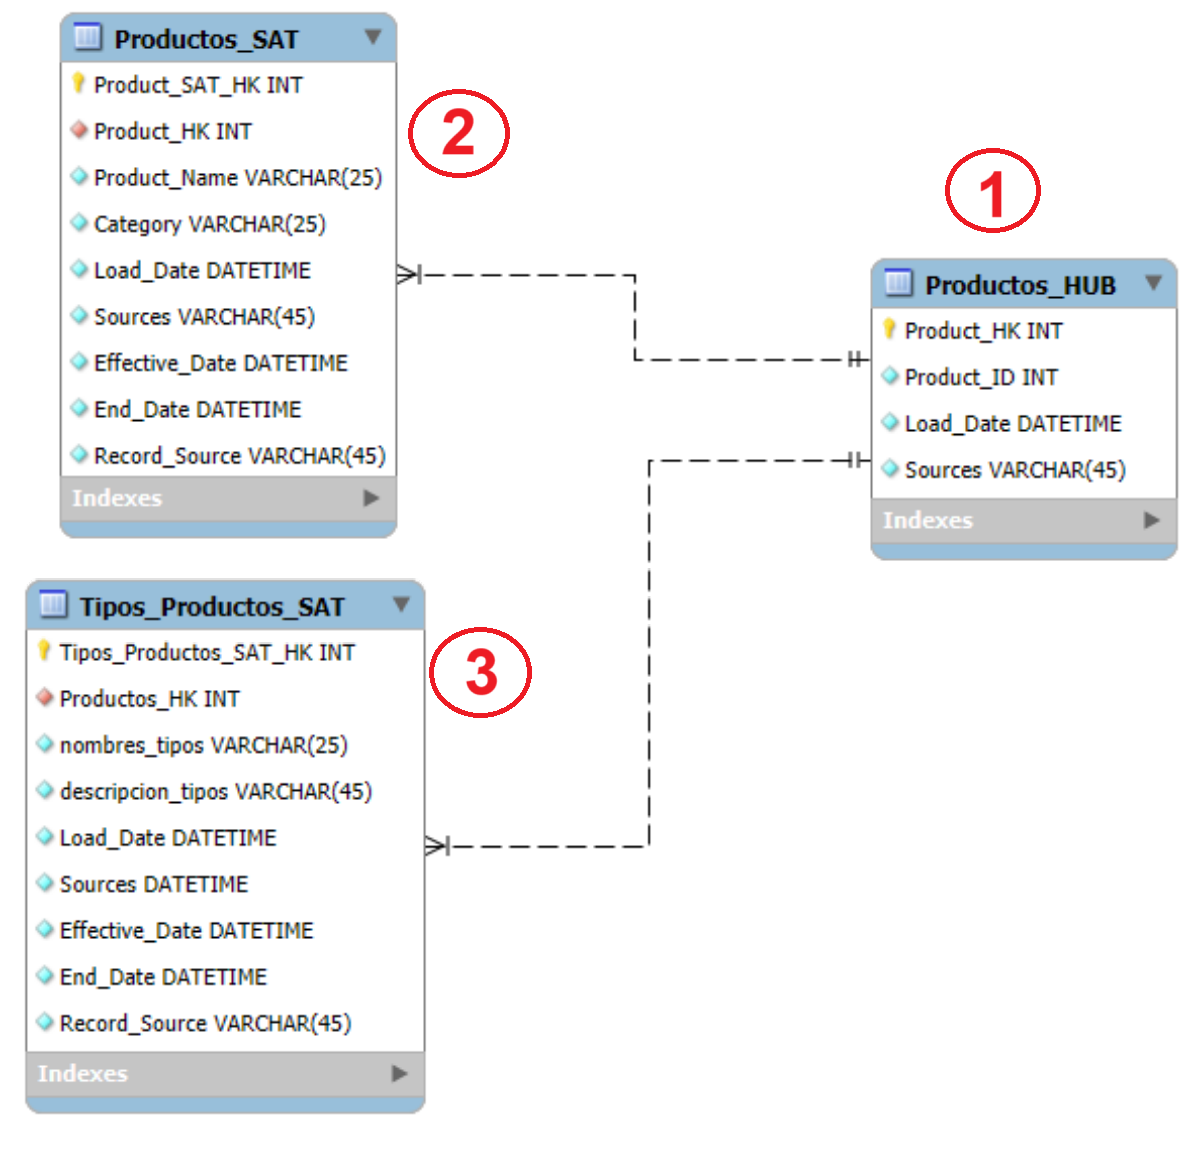

In [206]:
def generar_productos_hub(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Product_HK'] = i + 1
    data.loc[i, 'Product_ID'] = randint(1, 10)
    data.loc[i, 'Load_Date'] = fake.date_time_between()
    data.loc[i, 'Sources'] = str(randint(100000, 500000))
  return data

pdf_productos_hub = generar_productos_hub(10)
pdf_productos_hub

,Product_HK,Product_ID,Load_Date,Sources
0,1.0,10.0,2000-01-30 03:23:13.267250,350357
1,2.0,10.0,2004-08-16 02:01:25.899678,359680
2,3.0,2.0,2003-03-23 09:12:29.642457,498957
3,4.0,4.0,2015-05-06 03:39:21.809791,414946
4,5.0,8.0,2010-07-13 22:00:34.106893,413426
5,6.0,5.0,1998-01-26 18:47:03.622959,163526
6,7.0,8.0,2000-12-26 14:37:06.069285,482928
7,8.0,7.0,2024-09-25 04:12:38.580169,200142
8,9.0,8.0,2014-09-16 16:33:12.750458,129979
9,10.0,10.0,2015-03-23 20:51:16.347050,318313


In [207]:
df_hubproductos = Spark.createDataFrame(pdf_productos_hub,["Product_HK","Product_ID","Load_Date","Sources"])
df_hubproductos.show()

+----------+----------+--------------------+-------+
|Product_HK|Product_ID|           Load_Date|Sources|
+----------+----------+--------------------+-------+
|       1.0|      10.0|2000-01-30 03:23:...| 350357|
|       2.0|      10.0|2004-08-16 02:01:...| 359680|
|       3.0|       2.0|2003-03-23 09:12:...| 498957|
|       4.0|       4.0|2015-05-06 03:39:...| 414946|
|       5.0|       8.0|2010-07-13 22:00:...| 413426|
|       6.0|       5.0|1998-01-26 18:47:...| 163526|
|       7.0|       8.0|2000-12-26 14:37:...| 482928|
|       8.0|       7.0|2024-09-25 04:12:...| 200142|
|       9.0|       8.0|2014-09-16 16:33:...| 129979|
|      10.0|      10.0|2015-03-23 20:51:...| 318313|
+----------+----------+--------------------+-------+



In [208]:
def generar_productos_sat(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Product_SAT_HK'] = i + 1
    data.loc[i, 'Product_HK'] = randint(1, 10)
    data.loc[i, 'Product_Name'] = fake.name
    data.loc[i, 'category'] = fake.text
    data.loc[i, 'Load_Date'] = fake.date_time_between()
    data.loc[i, 'sources'] = str(randint(100000, 500000))
    data.loc[i, 'Effective_Date'] = fake.date_time_between()
    data.loc[i, 'End_Date'] = fake.date_time_between()
    data.loc[i, 'Record_Source'] = fake.text
  return data

pdf_productos_sat = generar_productos_sat(10)
pdf_productos_sat

,Product_SAT_HK,Product_HK,Product_Name,category,Load_Date,sources,Effective_Date,End_Date,Record_Source
0,1.0,5.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2008-03-20 13:00:41.707238,222451,2015-05-28 06:40:03.389301,2001-04-22 23:09:36.276744,<bound method Provider.text of <faker.provider...
1,2.0,9.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,1998-01-24 02:10:37.762959,238118,2000-08-29 04:21:07.314333,2017-05-03 00:46:53.681131,<bound method Provider.text of <faker.provider...
2,3.0,5.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2003-05-24 07:57:22.879004,478835,2013-05-11 20:30:21.078353,2009-04-07 15:41:53.993726,<bound method Provider.text of <faker.provider...
3,4.0,6.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2008-03-29 17:17:52.426420,146753,2020-05-19 05:54:55.315267,2018-12-31 05:25:21.191034,<bound method Provider.text of <faker.provider...
4,5.0,8.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,1997-10-07 17:12:11.727922,421963,2014-12-26 03:19:29.460114,2000-10-13 13:23:19.002648,<bound method Provider.text of <faker.provider...
5,6.0,4.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2001-10-29 13:20:09.412892,108813,2022-01-30 06:57:19.382988,2024-08-04 05:54:11.310819,<bound method Provider.text of <faker.provider...
6,7.0,7.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2018-04-02 07:11:11.766382,482997,2010-03-03 05:43:01.576114,2004-06-01 23:38:19.680184,<bound method Provider.text of <faker.provider...
7,8.0,9.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,1995-03-05 03:56:49.293514,494259,2023-12-22 03:20:42.876180,1998-12-07 03:27:10.527578,<bound method Provider.text of <faker.provider...
8,9.0,4.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2008-04-13 21:01:19.470787,156024,2006-09-08 01:24:32.736325,1999-01-16 03:25:50.192468,<bound method Provider.text of <faker.provider...
9,10.0,9.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2001-08-28 23:38:14.198235,153161,2015-09-14 15:43:47.113713,2023-10-15 08:07:47.259398,<bound method Provider.text of <faker.provider...


In [209]:
df_satproductos = Spark.createDataFrame(pdf_productos_sat,["Product_SAT_HK","Product_HK","Product_Name","category","Load_Date","sources","Effective_Date","End_Date","Record_Source"])
df_satproductos.show()

+--------------+----------+------------+--------+--------------------+-------+--------------------+--------------------+-------------+
|Product_SAT_HK|Product_HK|Product_Name|category|           Load_Date|sources|      Effective_Date|            End_Date|Record_Source|
+--------------+----------+------------+--------+--------------------+-------+--------------------+--------------------+-------------+
|           1.0|       5.0|          {}|      {}|2008-03-20 13:00:...| 222451|2015-05-28 06:40:...|2001-04-22 23:09:...|           {}|
|           2.0|       9.0|          {}|      {}|1998-01-24 02:10:...| 238118|2000-08-29 04:21:...|2017-05-03 00:46:...|           {}|
|           3.0|       5.0|          {}|      {}|2003-05-24 07:57:...| 478835|2013-05-11 20:30:...|2009-04-07 15:41:...|           {}|
|           4.0|       6.0|          {}|      {}|2008-03-29 17:17:...| 146753|2020-05-19 05:54:...|2018-12-31 05:25:...|           {}|
|           5.0|       8.0|          {}|      {}|1997-1

In [210]:
def generar_tipos_productos_sat(x):

  # Pandas DataFrame
  data = pd.DataFrame()
  for i in range(0, x):
    data.loc[i, 'Tipos_Productos_SAT_HK'] = i + 1
    data.loc[i, 'Productos_HK'] = randint(1, 10)
    data.loc[i, 'nombres_tipos'] = fake.name
    data.loc[i, 'descripcion_tipos'] = fake.text
    data.loc[i, 'Load_Date'] = fake.date_time_between()
    data.loc[i, 'sources'] = str(randint(100000, 500000))
    data.loc[i, 'Effective_Date'] = fake.date_time_between()
    data.loc[i, 'End_Date'] = fake.date_time_between()
    data.loc[i, 'Record_Source'] = fake.text
  return data

pdf_sat_tipos_productos = generar_tipos_productos_sat(10)
pdf_sat_tipos_productos

,Tipos_Productos_SAT_HK,Productos_HK,nombres_tipos,descripcion_tipos,Load_Date,sources,Effective_Date,End_Date,Record_Source
0,1.0,6.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,1999-12-23 10:54:05.742412,410755,2000-05-27 23:31:15.215843,2022-01-10 07:02:18.893451,<bound method Provider.text of <faker.provider...
1,2.0,1.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2019-11-13 23:26:11.160532,391552,2011-12-18 22:15:46.305037,2003-10-17 12:35:42.317199,<bound method Provider.text of <faker.provider...
2,3.0,3.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2023-06-04 02:41:06.291054,115100,2021-10-17 13:02:50.668106,1998-04-09 03:59:01.391841,<bound method Provider.text of <faker.provider...
3,4.0,5.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2010-11-05 16:42:53.790710,167872,2013-01-14 18:30:35.214696,2009-05-04 04:48:52.638433,<bound method Provider.text of <faker.provider...
4,5.0,2.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2004-10-02 17:10:33.239276,314403,2022-11-27 04:05:31.762831,2011-10-09 22:51:43.301384,<bound method Provider.text of <faker.provider...
5,6.0,4.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2021-01-26 09:54:18.687222,162543,2018-12-22 16:20:28.306824,1999-09-27 17:59:06.565937,<bound method Provider.text of <faker.provider...
6,7.0,9.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2004-01-18 02:22:03.260782,457123,2001-05-21 10:00:39.387031,2010-07-21 16:34:08.201574,<bound method Provider.text of <faker.provider...
7,8.0,2.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2016-11-17 13:46:05.187019,161190,2009-11-27 09:28:58.606329,2001-03-18 17:32:40.099106,<bound method Provider.text of <faker.provider...
8,9.0,2.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2018-08-21 07:30:07.581745,461592,1996-08-01 12:15:21.187909,2013-11-05 05:50:00.443730,<bound method Provider.text of <faker.provider...
9,10.0,9.0,<bound method Provider.name of <faker.provider...,<bound method Provider.text of <faker.provider...,2009-04-01 08:05:06.223892,442379,1999-01-13 00:33:59.736649,2003-07-29 22:57:28.433592,<bound method Provider.text of <faker.provider...


In [211]:
df_sattiposproductos = Spark.createDataFrame(pdf_sat_tipos_productos,["Tipos_Productos_SAT_HK","Productos_HK","nombres_tipos","descripcion_tipos","Load_Date","sources","Effective_Date","End_Date","Record_Source"])
df_sattiposproductos.show()

+----------------------+------------+-------------+-----------------+--------------------+-------+--------------------+--------------------+-------------+
|Tipos_Productos_SAT_HK|Productos_HK|nombres_tipos|descripcion_tipos|           Load_Date|sources|      Effective_Date|            End_Date|Record_Source|
+----------------------+------------+-------------+-----------------+--------------------+-------+--------------------+--------------------+-------------+
|                   1.0|         6.0|           {}|               {}|1999-12-23 10:54:...| 410755|2000-05-27 23:31:...|2022-01-10 07:02:...|           {}|
|                   2.0|         1.0|           {}|               {}|2019-11-13 23:26:...| 391552|2011-12-18 22:15:...|2003-10-17 12:35:...|           {}|
|                   3.0|         3.0|           {}|               {}|2023-06-04 02:41:...| 115100|2021-10-17 13:02:...|1998-04-09 03:59:...|           {}|
|                   4.0|         5.0|           {}|               {}|2